In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from config import api_key

# Import API key
# with open('\\Users\\medinam\\Desktop\\config.py', 'r') as api_key:
#     mykey=api_key.read()
#     mykey=mykey.split('=')
#     mykey=mykey[1].strip()
# api_key = mykey.strip('"')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

14326d59ed425b7b9d1a39e7f0450b79


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"-------------------------------")
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Call cities generated by CityPy module
    try: 

        response = requests.get(f"{url}{api_key}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
#Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
    
    
    

-------------------------------
Beginning Data Retrieval
-------------------------------
Processing Record 1 | Iqaluit
Processing Record 2 | Ostrovnoy
Processing Record 3 | Kununurra
Processing Record 4 | Laguna
Processing Record 5 | Busselton
Processing Record 6 | Saint-Philippe
Processing Record 7 | Dalvik
Processing Record 8 | Brandon
City not found. Skipping...
Processing Record 9 | Butaritari
Processing Record 10 | Jamestown
Processing Record 11 | Rikitea
Processing Record 12 | Port Alfred
City not found. Skipping...
Processing Record 13 | Arraial do Cabo
Processing Record 14 | General Pico
Processing Record 15 | Nome
Processing Record 16 | Bethel
Processing Record 17 | Lebu
Processing Record 18 | Maţāy
City not found. Skipping...
Processing Record 19 | Redcar
Processing Record 20 | Mataura
Processing Record 21 | Camaná
Processing Record 22 | Punta Arenas
Processing Record 23 | Port Elizabeth
Processing Record 24 | Savannah Bight
Processing Record 25 | Barrow
Processing Record 26 

Processing Record 228 | Vizinga
Processing Record 229 | Bilma
City not found. Skipping...
Processing Record 230 | Avarua
Processing Record 231 | Erzurum Province
Processing Record 232 | Annau
Processing Record 233 | Cherskiy
Processing Record 234 | Moose Factory
Processing Record 235 | Makakilo City
Processing Record 236 | Kloulklubed
Processing Record 237 | San Luis
Processing Record 238 | East London
Processing Record 239 | Belmonte
City not found. Skipping...
Processing Record 240 | Steinkjer
Processing Record 241 | Sept-Îles
Processing Record 242 | Ahipara
Processing Record 243 | Simbahan
City not found. Skipping...
Processing Record 244 | Naze
Processing Record 245 | Shagonar
Processing Record 246 | Rotifunk
Processing Record 247 | Altay
Processing Record 248 | Norman Wells
City not found. Skipping...
City not found. Skipping...
Processing Record 249 | Mahébourg
Processing Record 250 | Makkah al Mukarramah
Processing Record 251 | Broome
Processing Record 252 | Skibbereen
Processin

Processing Record 455 | Paso de los Toros
Processing Record 456 | Paramonga
Processing Record 457 | Katobu
Processing Record 458 | Maryborough
Processing Record 459 | Sabha
Processing Record 460 | Cabedelo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 461 | Barra do Garças
Processing Record 462 | Husavik
Processing Record 463 | Jacmel
Processing Record 464 | Caucaia
Processing Record 465 | Noumea
Processing Record 466 | Sundarnagar
Processing Record 467 | Lethem
Processing Record 468 | Sinnamary
Processing Record 469 | Celestún
City not found. Skipping...
Processing Record 470 | Sinop Province
Processing Record 471 | Mongo
Processing Record 472 | Aksu
Processing Record 473 | Mountain Home
Processing Record 474 | Bireun
Processing Record 475 | Chennai
Processing Record 476 | Gorlice
Processing Record 477 | Brae
Processing Record 478 | Abu Dhabi
Processing Record 479 | Bandarbeyla
City not found. Skipping...
Processing Record 480 | 

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iqaluit,75,CA,1605023904,78,63.75,-68.51,12.20,19.46
1,Ostrovnoy,97,RU,1605024404,83,68.05,39.51,34.83,20.02
2,Kununurra,1,AU,1605024122,78,-15.77,128.73,82.40,4.70
3,Laguna,1,US,1605024406,59,38.42,-121.42,37.99,0.76
4,Busselton,67,AU,1605024408,95,-33.65,115.33,50.00,6.06


In [5]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,546.000000,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000
mean,51.743590,1.605025e+09,73.012821,20.547308,17.238168,59.154872,8.433242
std,38.700641,2.708272e+02,19.542610,33.432058,88.861778,24.470890,5.900297
min,0.000000,1.605024e+09,8.000000,-54.800000,-179.170000,-23.980000,0.070000
25%,5.000000,1.605025e+09,63.000000,-6.385000,-59.965000,39.232500,4.000000
50%,56.500000,1.605025e+09,77.000000,23.635000,19.635000,66.865000,6.930000
75%,90.000000,1.605025e+09,87.000000,49.572500,91.285000,78.892500,11.410000
max,100.000000,1.605025e+09,100.000000,78.220000,179.320000,101.170000,33.730000


In [6]:
#determine cities with humidity over 100%
dirty_city_data = weather_data[(weather_data["Humidity"] >100)].index

dirty_city_data

Int64Index([], dtype='int64')

In [7]:
clean_city_data = weather_data.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iqaluit,75,CA,1605023904,78,63.75,-68.51,12.20,19.46
1,Ostrovnoy,97,RU,1605024404,83,68.05,39.51,34.83,20.02
2,Kununurra,1,AU,1605024122,78,-15.77,128.73,82.40,4.70
3,Laguna,1,US,1605024406,59,38.42,-121.42,37.99,0.76
4,Busselton,67,AU,1605024408,95,-33.65,115.33,50.00,6.06


In [8]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label="City_ID")

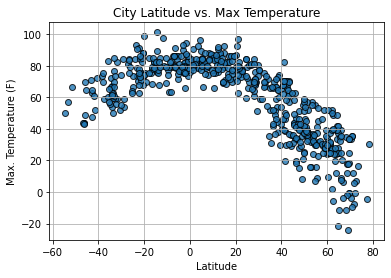

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor="black", alpha=0.8, 
            linewidths=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

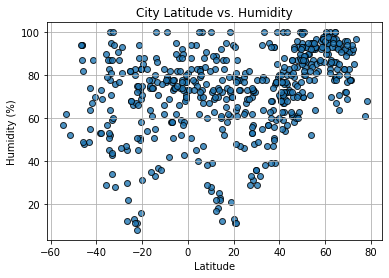

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor="black", alpha=0.8, 
            linewidths=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

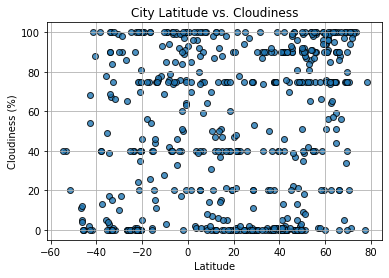

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black", alpha=0.8, 
            linewidths=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

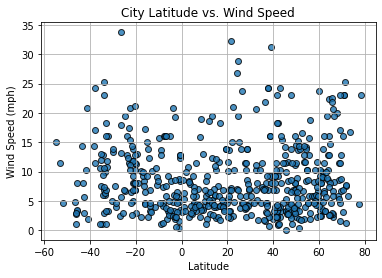

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor="black", alpha=0.8, 
            linewidths=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

The r-value is: 0.7531588862294588


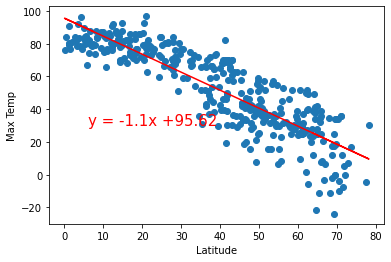

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

The r-value is: 0.43070962134454777


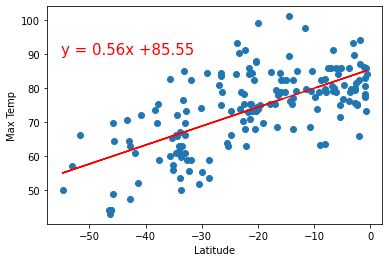

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,90))

The r-value is: 0.19221036462558885


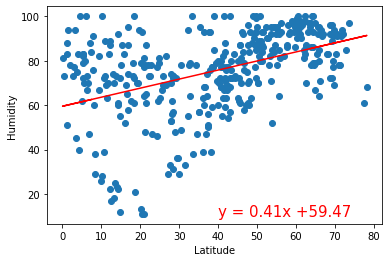

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40, 10))

The r-value is: 0.009993166301219424


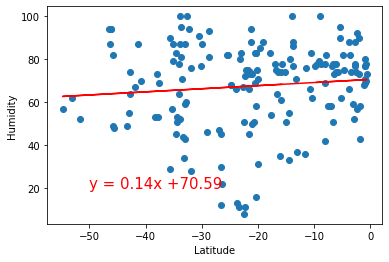

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r-value is: 0.06062507684078583


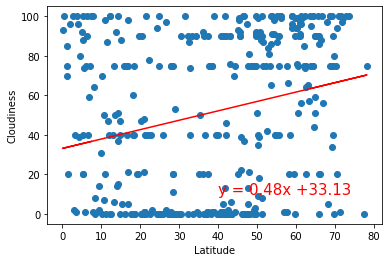

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40, 10))

The r-value is: 0.1313078177789463


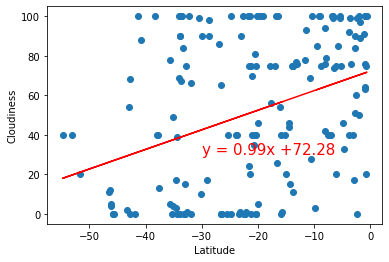

In [23]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30, 30))

The r-value is: 0.02412802074740828


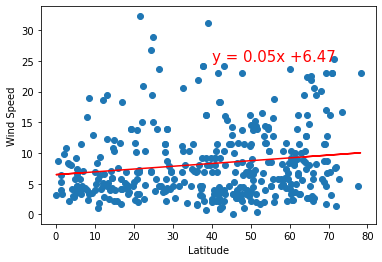

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40, 25))

The r-value is: 0.022189877065589017


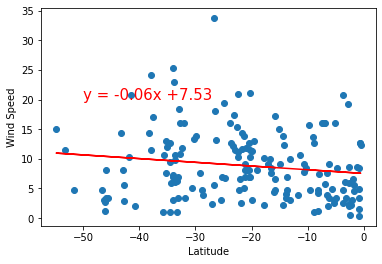

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))